In [7]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../src/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from harmonic.functions import gaussian

In [12]:
real, imag = np.meshgrid(*(np.linspace(-1, 1, 1000) for _ in range(2)))
pdf = gaussian(real + imag * 1.j, 2)

[]

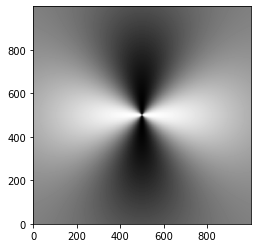

In [13]:
plt.imshow(pdf.real, cmap='gray', origin='lower')
plt.plot()

[]

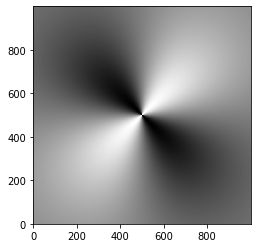

In [14]:
plt.imshow(pdf.imag, cmap='gray', origin='lower')
plt.plot()